In [1]:
import pandas as pd
import numpy as np
import itertools

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!ls

README.md                 constituents_csv.csv      scac.csv
all_stocks_5yr.csv        final2.csv                stock-fraud-predict.ipynb


# Loading and merging data

## Data on class actions from Stanford

In [4]:
df = pd.read_csv('scac.csv')

In [5]:
df.head()

,filing_name,filing_date,district_court,exchange,ticker
0,"ILG, Inc.",07/06/2018,D. Delaware,NASDAQ,ILG
1,KLX Inc.,07/06/2018,D. Delaware,NASDAQ,KLXI
2,Triangle Capital Corporation,07/06/2018,E.D. North Carolina,New York SE,TCAP
3,Vectren Corporation,07/05/2018,S.D. Indiana,New York SE,VVC
4,DCT Industrial Trust Inc.,07/02/2018,D. Colorado,New York SE,DCT


## Large data set on all publicly traded stocks

In [6]:
df1 = pd.read_csv('all_stocks_5yr.csv')

In [7]:
df1.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
date      619040 non-null object
open      619029 non-null float64
high      619032 non-null float64
low       619032 non-null float64
close     619040 non-null float64
volume    619040 non-null int64
Name      619040 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4996 entries, 0 to 4995
Data columns (total 5 columns):
filing_name       4996 non-null object
filing_date       4996 non-null object
district_court    4996 non-null object
exchange          4996 non-null object
ticker            4996 non-null object
dtypes: object(5)
memory usage: 195.2+ KB


In [10]:
df1.rename(columns={'Name':'ticker'}, inplace=True)

In [11]:
df1.head()

,date,open,high,low,close,volume,ticker
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


## Add column indicating companies that have been sued (sued=1)

In [12]:
df['sued'] = 1

In [13]:
df.head()

,filing_name,filing_date,district_court,exchange,ticker,sued
0,"ILG, Inc.",07/06/2018,D. Delaware,NASDAQ,ILG,1
1,KLX Inc.,07/06/2018,D. Delaware,NASDAQ,KLXI,1
2,Triangle Capital Corporation,07/06/2018,E.D. North Carolina,New York SE,TCAP,1
3,Vectren Corporation,07/05/2018,S.D. Indiana,New York SE,VVC,1
4,DCT Industrial Trust Inc.,07/02/2018,D. Colorado,New York SE,DCT,1


## Left merge on ticker column

In [14]:
#df_merge = pd.merge(df, df1, on='ticker')
df_merged = df1.merge(df,how='left', left_on='ticker', right_on='ticker')

In [15]:
df.head()

,filing_name,filing_date,district_court,exchange,ticker,sued
0,"ILG, Inc.",07/06/2018,D. Delaware,NASDAQ,ILG,1
1,KLX Inc.,07/06/2018,D. Delaware,NASDAQ,KLXI,1
2,Triangle Capital Corporation,07/06/2018,E.D. North Carolina,New York SE,TCAP,1
3,Vectren Corporation,07/05/2018,S.D. Indiana,New York SE,VVC,1
4,DCT Industrial Trust Inc.,07/02/2018,D. Colorado,New York SE,DCT,1


In [16]:
df1.head()

,date,open,high,low,close,volume,ticker
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [17]:
df_merged.head()

,date,open,high,low,close,volume,ticker,filing_name,filing_date,district_court,exchange,sued
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,NaN,NaN,NaN,NaN,NaN
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,NaN,NaN,NaN,NaN,NaN
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,NaN,NaN,NaN,NaN,NaN
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,NaN,NaN,NaN,NaN,NaN
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,NaN,NaN,NaN,NaN,NaN


In [18]:
df_merged.sued.unique()

array([nan,  1.])

In [19]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 837587 entries, 0 to 837586
Data columns (total 12 columns):
date              837587 non-null object
open              837574 non-null float64
high              837577 non-null float64
low               837577 non-null float64
close             837587 non-null float64
volume            837587 non-null int64
ticker            837587 non-null object
filing_name       519028 non-null object
filing_date       519028 non-null object
district_court    519028 non-null object
exchange          519028 non-null object
sued              519028 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 83.1+ MB


## Add sued column for merged data set and remove previous column

In [20]:
df_merged['sued'] = np.where(df_merged['sued']==1, 1, 0)

In [21]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 837587 entries, 0 to 837586
Data columns (total 12 columns):
date              837587 non-null object
open              837574 non-null float64
high              837577 non-null float64
low               837577 non-null float64
close             837587 non-null float64
volume            837587 non-null int64
ticker            837587 non-null object
filing_name       519028 non-null object
filing_date       519028 non-null object
district_court    519028 non-null object
exchange          519028 non-null object
sued              837587 non-null int64
dtypes: float64(4), int64(2), object(6)
memory usage: 83.1+ MB


In [22]:
df_merged.drop(columns='sued')

,date,open,high,low,close,volume,ticker,filing_name,filing_date,district_court,exchange
0,2013-02-08,15.07,15.1200,14.6300,14.75,8407500,AAL,NaN,NaN,NaN,NaN
1,2013-02-11,14.89,15.0100,14.2600,14.46,8882000,AAL,NaN,NaN,NaN,NaN
2,2013-02-12,14.45,14.5100,14.1000,14.27,8126000,AAL,NaN,NaN,NaN,NaN
3,2013-02-13,14.30,14.9400,14.2500,14.66,10259500,AAL,NaN,NaN,NaN,NaN
4,2013-02-14,14.94,14.9600,13.1600,13.99,31879900,AAL,NaN,NaN,NaN,NaN
5,2013-02-15,13.93,14.6100,13.9300,14.50,15628000,AAL,NaN,NaN,NaN,NaN
6,2013-02-19,14.33,14.5600,14.0800,14.26,11354400,AAL,NaN,NaN,NaN,NaN
7,2013-02-20,14.17,14.2600,13.1500,13.33,14725200,AAL,NaN,NaN,NaN,NaN
8,2013-02-21,13.62,13.9500,12.9000,13.37,11922100,AAL,NaN,NaN,NaN,NaN
9,2013-02-22,13.57,13.6000,13.2100,13.57,6071400,AAL,NaN,NaN,NaN,NaN


In [23]:
df_merged.rename(columns={'sued1': 'sued'}, inplace=True)

In [24]:
df_merged.exchange.value_counts()

New York SE         378430
NASDAQ              135562
American SE           2518
ETF                   1259
Privately Traded      1259
Name: exchange, dtype: int64

In [25]:
df_merged.filing_name.value_counts()

Juniper Networks, Inc.                              6295
Chesapeake Energy Corporation                       5036
Medtronic, Inc.                                     5036
General Electric Company                            5036
Advanced Micro Devices, Inc.                        3777
Ford Motor Company                                  3777
Lockheed Martin Corporation                         3777
Boston Scientific Corporation                       3777
Xerox Corporation                                   3777
Aetna Inc.                                          3777
Chipotle Mexican Grill, Inc.                        3777
Johnson & Johnson                                   3777
Facebook, Inc.                                      3777
American Express Company                            3777
The Boeing Company                                  3777
Merck & Co., Inc.                                   3777
General Motors Company                              3777
Equinix, Inc.                  

## Convert date field to datetime data type

In [26]:
from datetime import datetime

In [27]:
df_merged.filing_date = pd.to_datetime(df_merged['filing_date'])

In [28]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 837587 entries, 0 to 837586
Data columns (total 12 columns):
date              837587 non-null object
open              837574 non-null float64
high              837577 non-null float64
low               837577 non-null float64
close             837587 non-null float64
volume            837587 non-null int64
ticker            837587 non-null object
filing_name       519028 non-null object
filing_date       519028 non-null datetime64[ns]
district_court    519028 non-null object
exchange          519028 non-null object
sued              837587 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 83.1+ MB


## Add additional data set with companies listed by sector

In [29]:
df_sectors = pd.read_csv('constituents_csv.csv')

In [30]:
df_sectors.head()

,Symbol,Name,Sector
0,MMM,3M Company,Industrials
1,AOS,A.O. Smith Corp,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie Inc.,Health Care
4,ACN,Accenture plc,Information Technology


In [31]:
df_sectors.rename(columns={'Symbol':'ticker'}, inplace=True)

In [32]:
df_sectors.head()

,ticker,Name,Sector
0,MMM,3M Company,Industrials
1,AOS,A.O. Smith Corp,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie Inc.,Health Care
4,ACN,Accenture plc,Information Technology


## Left merge on ticker

In [33]:
df_merged2 = df_merged.merge(df_sectors,how='left', left_on='ticker', right_on='ticker')
#df_merge2 = pd.merge(df_merge, df_sectors, on='ticker')

In [34]:
df_merged2.head()

,date,open,high,low,close,volume,ticker,filing_name,filing_date,district_court,exchange,sued,Name,Sector
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,NaN,NaT,NaN,NaN,0,American Airlines Group,Industrials
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,NaN,NaT,NaN,NaN,0,American Airlines Group,Industrials
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,NaN,NaT,NaN,NaN,0,American Airlines Group,Industrials
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,NaN,NaT,NaN,NaN,0,American Airlines Group,Industrials
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,NaN,NaT,NaN,NaN,0,American Airlines Group,Industrials


In [35]:
df_merged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 837587 entries, 0 to 837586
Data columns (total 14 columns):
date              837587 non-null object
open              837574 non-null float64
high              837577 non-null float64
low               837577 non-null float64
close             837587 non-null float64
volume            837587 non-null int64
ticker            837587 non-null object
filing_name       519028 non-null object
filing_date       519028 non-null datetime64[ns]
district_court    519028 non-null object
exchange          519028 non-null object
sued              837587 non-null int64
Name              822479 non-null object
Sector            822479 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(7)
memory usage: 95.9+ MB


In [36]:
df_merged2.Sector.value_counts()

Financials                    137479
Health Care                   130185
Information Technology        122571
Consumer Discretionary        121198
Industrials                   101845
Consumer Staples               47152
Energy                         41699
Utilities                      41537
Real Estate                    41531
Materials                      30987
Telecommunication Services      6295
Name: Sector, dtype: int64

## Add dummies for categorical variable: sector

In [37]:
df_sector = pd.get_dummies(df_merged2['Sector'])

In [38]:
df_final = pd.concat([df_merged2, df_sector], axis=1)

In [39]:
df_final.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'ticker',
       'filing_name', 'filing_date', 'district_court', 'exchange', 'sued',
       'Name', 'Sector', 'Consumer Discretionary', 'Consumer Staples',
       'Energy', 'Financials', 'Health Care', 'Industrials',
       'Information Technology', 'Materials', 'Real Estate',
       'Telecommunication Services', 'Utilities'],
      dtype='object')

In [42]:
df_final.head()

,date,open,high,low,close,volume,ticker,filing_name,filing_date,district_court,...,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Telecommunication Services,Utilities
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,NaN,NaT,NaN,...,0,0,0,0,1,0,0,0,0,0
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,NaN,NaT,NaN,...,0,0,0,0,1,0,0,0,0,0
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,NaN,NaT,NaN,...,0,0,0,0,1,0,0,0,0,0
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,NaN,NaT,NaN,...,0,0,0,0,1,0,0,0,0,0
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,NaN,NaT,NaN,...,0,0,0,0,1,0,0,0,0,0


In [43]:
df_final.describe()

,open,high,low,close,volume,sued,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Telecommunication Services,Utilities
count,837574.000000,837577.000000,837577.000000,837587.000000,8.375870e+05,837587.000000,837587.000000,837587.000000,837587.000000,837587.000000,837587.000000,837587.000000,837587.000000,837587.000000,837587.000000,837587.000000,837587.000000
mean,83.500098,84.267744,82.720669,83.519700,6.110539e+06,0.619671,0.144699,0.056295,0.049785,0.164137,0.155429,0.121593,0.146338,0.036996,0.049584,0.007516,0.049591
std,106.820307,107.744581,105.852739,106.831904,1.303700e+07,0.485468,0.351797,0.230491,0.217500,0.370400,0.362313,0.326816,0.353445,0.188751,0.217084,0.086366,0.217099
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.710000,38.070000,37.340000,37.705000,1.197900e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,60.460000,61.030000,59.900000,60.490000,2.456047e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,93.290000,94.120000,92.490000,93.330000,5.500547e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Add dummies for categorical variable: exchange

In [54]:
df_exchangedummies = pd.get_dummies(df_final['exchange'])

In [55]:
df_final2 = pd.concat([df_final, df_exchangedummies], axis=1)

In [56]:
df_final2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 837587 entries, 0 to 837586
Data columns (total 30 columns):
date                          837587 non-null object
open                          837574 non-null float64
high                          837577 non-null float64
low                           837577 non-null float64
close                         837587 non-null float64
volume                        837587 non-null int64
ticker                        837587 non-null object
filing_name                   519028 non-null object
filing_date                   519028 non-null datetime64[ns]
district_court                519028 non-null object
exchange                      519028 non-null object
sued                          837587 non-null int64
Name                          822479 non-null object
Sector                        822479 non-null object
Consumer Discretionary        837587 non-null uint8
Consumer Staples              837587 non-null uint8
Energy                        837

## Visualizations

### As a percentage how many companies are sued?

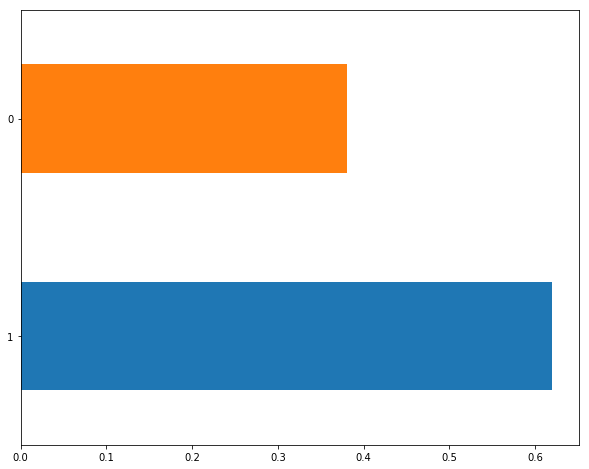

In [27]:
df_final2.sued.value_counts(normalize=True).plot(kind='barh', figsize=(10,8))

### Which sectors have the highest percentage of sued companies?

In [29]:
df_final2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837587 entries, 0 to 837586
Data columns (total 26 columns):
date                          837587 non-null object
volume                        837587 non-null int64
ticker                        837587 non-null object
filing_name                   519028 non-null object
filing_date                   519028 non-null object
district_court                519028 non-null object
exchange                      519028 non-null object
sued                          837587 non-null int64
Name                          822479 non-null object
Sector                        822479 non-null object
Consumer Discretionary        837587 non-null int64
Consumer Staples              837587 non-null int64
Energy                        837587 non-null int64
Financials                    837587 non-null int64
Health Care                   837587 non-null int64
Industrials                   837587 non-null int64
Information Technology        837587 non-null int

# Logistic regression
## Target is 'sued' feature

In [11]:
X = df_final2[['volume','American SE','ETF','NASDAQ','New York SE','Privately Traded','Consumer Discretionary','Consumer Staples','Energy','Financials','Health Care','Industrials','Information Technology','Materials','Real Estate','Telecommunication Services','Utilities']]
y = df_final2.sued
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [62]:
logreg = LogisticRegression(fit_intercept = False)
y_score = logreg.fit(X_train, y_train).decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

/Users/joelkaplan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC: 0.6734487561157878


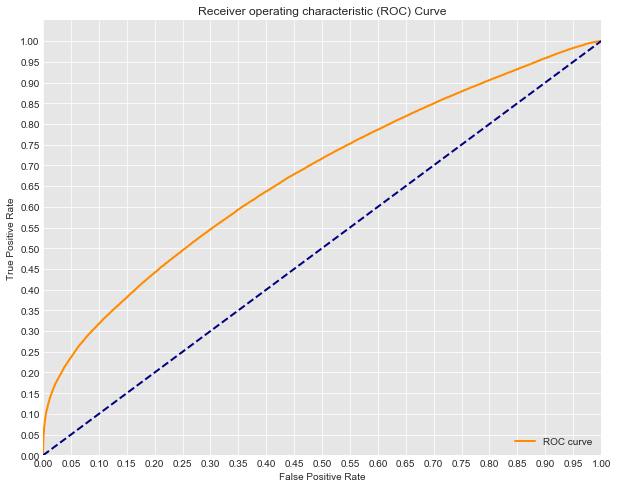

In [63]:
#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Test with several normalization weights

/Users/joelkaplan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.001, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)


/Users/joelkaplan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC for 0.001: 0.6734487561157878


/Users/joelkaplan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


/Users/joelkaplan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC for 0.01: 0.6734487561157878


/Users/joelkaplan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


/Users/joelkaplan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC for 0.1: 0.6734487561157878


/Users/joelkaplan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


/Users/joelkaplan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC for 1: 0.6734487561157878


/Users/joelkaplan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


/Users/joelkaplan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC for 10: 0.6734487561157878


/Users/joelkaplan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


/Users/joelkaplan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC for 100: 0.6734487561157878


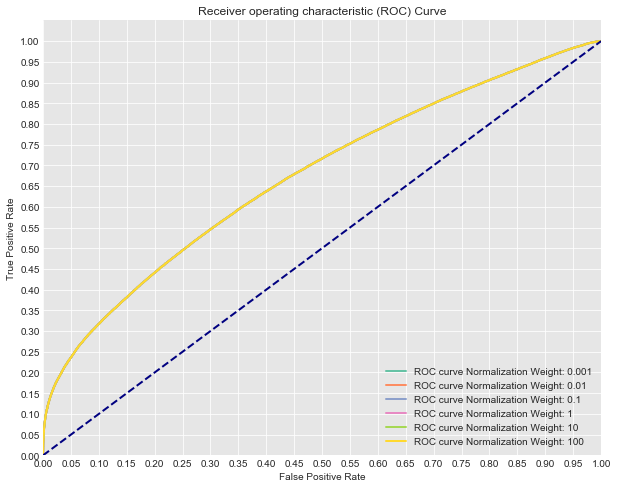

In [65]:
C_param_range = [0.001,0.01,0.1,1,10,100]
names = [0.001,0.01,0.1,1,10,100]
colors = sns.color_palette("Set2")

plt.figure(figsize=(10,8))

for n, c in enumerate(C_param_range):
    #Fit a model
    logreg = LogisticRegression(fit_intercept = False, C = c) #Starter code
    model_log = logreg.fit(X_train, y_train)
    print(model_log) #Preview model params

    #Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.fit(X_train, y_train).decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve Normalization Weight: {}'.format(names[n]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Print feature coefficients

In [103]:
logreg.coef_

array([[ 1.30101216e-07,  6.41948533e-16,  3.83889797e-16,
         3.57725269e-14,  9.87908219e-14,  3.97707271e-16,
        -3.33741368e-15, -2.29992205e-15, -8.95739644e-15,
         1.07596458e-14,  2.56470330e-14, -5.62457797e-15,
         4.46291128e-15, -6.31793033e-15, -1.09229418e-14,
         1.12692704e-16,  1.91169706e-16]])

In [73]:
X.head()

,volume,American SE,ETF,NASDAQ,New York SE,Privately Traded,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Telecommunication Services,Utilities
0,8407500,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,8882000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,8126000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,10259500,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,31879900,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [76]:
df_final2.describe()

,open,high,low,close,volume,sued,Consumer Discretionary,Consumer Staples,Energy,Financials,...,Information Technology,Materials,Real Estate,Telecommunication Services,Utilities,American SE,ETF,NASDAQ,New York SE,Privately Traded
count,837574.000000,837577.000000,837577.000000,837587.000000,8.375870e+05,837587.000000,837587.000000,837587.000000,837587.000000,837587.000000,...,837587.000000,837587.000000,837587.000000,837587.000000,837587.000000,837587.000000,837587.000000,837587.000000,837587.000000,837587.000000
mean,83.500098,84.267744,82.720669,83.519700,6.110539e+06,0.619671,0.144699,0.056295,0.049785,0.164137,...,0.146338,0.036996,0.049584,0.007516,0.049591,0.003006,0.001503,0.161848,0.451810,0.001503
std,106.820307,107.744581,105.852739,106.831904,1.303700e+07,0.485468,0.351797,0.230491,0.217500,0.370400,...,0.353445,0.188751,0.217084,0.086366,0.217099,0.054747,0.038741,0.368312,0.497673,0.038741
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.710000,38.070000,37.340000,37.705000,1.197900e+06,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,60.460000,61.030000,59.900000,60.490000,2.456047e+06,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,93.290000,94.120000,92.490000,93.330000,5.500547e+06,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
df_final2 = pd.read_csv('final2.csv')

In [8]:
df_final2.drop(['open','high','low','close','Unnamed: 0'], axis=1, inplace=True)

In [9]:
df_final2.head()

,date,volume,ticker,filing_name,filing_date,district_court,exchange,sued,Name,Sector,...,Information Technology,Materials,Real Estate,Telecommunication Services,Utilities,American SE,ETF,NASDAQ,New York SE,Privately Traded
0,2013-02-08,8407500,AAL,NaN,NaN,NaN,NaN,0,American Airlines Group,Industrials,...,0,0,0,0,0,0,0,0,0,0
1,2013-02-11,8882000,AAL,NaN,NaN,NaN,NaN,0,American Airlines Group,Industrials,...,0,0,0,0,0,0,0,0,0,0
2,2013-02-12,8126000,AAL,NaN,NaN,NaN,NaN,0,American Airlines Group,Industrials,...,0,0,0,0,0,0,0,0,0,0
3,2013-02-13,10259500,AAL,NaN,NaN,NaN,NaN,0,American Airlines Group,Industrials,...,0,0,0,0,0,0,0,0,0,0
4,2013-02-14,31879900,AAL,NaN,NaN,NaN,NaN,0,American Airlines Group,Industrials,...,0,0,0,0,0,0,0,0,0,0


In [99]:
df_final2.groupby(['ticker'])['volume'].mean()

ticker
A       2.338039e+06
AAL     9.390321e+06
AAP     1.078043e+06
AAPL    5.404790e+07
ABBV    7.870683e+06
ABC     2.005738e+06
ABT     6.964037e+06
ACN     2.596238e+06
ADBE    2.998134e+06
ADI     2.451738e+06
ADM     3.647858e+06
ADP     2.022774e+06
ADS     6.193085e+05
ADSK    2.482751e+06
AEE     1.622724e+06
AEP     2.781243e+06
AES     5.568656e+06
AET     2.716448e+06
AFL     2.116352e+06
AGN     2.880077e+06
AIG     8.419467e+06
AIV     1.198721e+06
AIZ     5.451393e+05
AJG     9.244311e+05
AKAM    2.182469e+06
ALB     1.160882e+06
ALGN    8.855518e+05
ALK     1.537616e+06
ALL     2.407103e+06
ALLE    7.397245e+05
            ...     
VRTX    1.859520e+06
VTR     2.116031e+06
VZ      1.609307e+07
WAT     5.003796e+05
WBA     5.432793e+06
WDC     3.363798e+06
WEC     1.775573e+06
WFC     1.851148e+07
WHR     9.784654e+05
WLTW    7.854822e+05
WM      2.014002e+06
WMB     8.013221e+06
WMT     8.175690e+06
WRK     1.700808e+06
WU      5.365384e+06
WY      4.258757e+06
WYN   

In [10]:
df_final2.drop('Unnamed: 0', inplace=True, axis=1)

In [14]:
df_final2.reset_index(drop=True)

,date,volume,ticker,filing_name,filing_date,district_court,exchange,sued,Name,Sector,...,Information Technology,Materials,Real Estate,Telecommunication Services,Utilities,American SE,ETF,NASDAQ,New York SE,Privately Traded
0,2013-02-08,8407500,AAL,NaN,NaN,NaN,NaN,0,American Airlines Group,Industrials,...,0,0,0,0,0,0,0,0,0,0
1,2013-02-11,8882000,AAL,NaN,NaN,NaN,NaN,0,American Airlines Group,Industrials,...,0,0,0,0,0,0,0,0,0,0
2,2013-02-12,8126000,AAL,NaN,NaN,NaN,NaN,0,American Airlines Group,Industrials,...,0,0,0,0,0,0,0,0,0,0
3,2013-02-13,10259500,AAL,NaN,NaN,NaN,NaN,0,American Airlines Group,Industrials,...,0,0,0,0,0,0,0,0,0,0
4,2013-02-14,31879900,AAL,NaN,NaN,NaN,NaN,0,American Airlines Group,Industrials,...,0,0,0,0,0,0,0,0,0,0
5,2013-02-15,15628000,AAL,NaN,NaN,NaN,NaN,0,American Airlines Group,Industrials,...,0,0,0,0,0,0,0,0,0,0
6,2013-02-19,11354400,AAL,NaN,NaN,NaN,NaN,0,American Airlines Group,Industrials,...,0,0,0,0,0,0,0,0,0,0
7,2013-02-20,14725200,AAL,NaN,NaN,NaN,NaN,0,American Airlines Group,Industrials,...,0,0,0,0,0,0,0,0,0,0
8,2013-02-21,11922100,AAL,NaN,NaN,NaN,NaN,0,American Airlines Group,Industrials,...,0,0,0,0,0,0,0,0,0,0
9,2013-02-22,6071400,AAL,NaN,NaN,NaN,NaN,0,American Airlines Group,Industrials,...,0,0,0,0,0,0,0,0,0,0


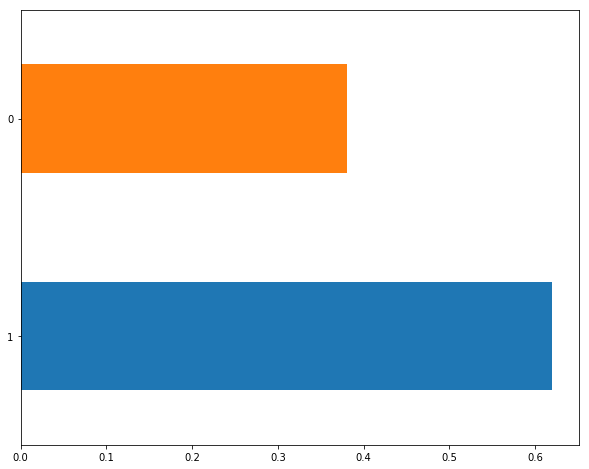

In [22]:
df_final2.sued.value_counts(normalize=True).plot(kind='barh', figsize=(10,8))

In [ ]:
#lasso/ridge
#confusion matrix
#random forest: n_estimators, max_depth, min_samples_split

#visualization: distribution of companies by sector; scatter matrix

#need more visualizations for presentations
#good coding

In [15]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [16]:
clf = tree.DecisionTreeClassifier()

clf = clf.fit(X,y)

In [17]:
cross_val_score(clf, X, y, cv=10)

array([1.        , 0.98496878, 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.98496878, 1.        , 1.        ])

In [32]:
y_pred_class = clf.predict(X_test)

In [30]:
from sklearn.metrics import roc_curve
from sklearn import metrics

In [33]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[ 79411      0]
 [     0 129986]]


In [34]:
y_test.value_counts()

1    129986
0     79411
Name: sued, dtype: int64

In [35]:
max(y_test.mean(), 1 - y_test.mean())

0.6207634302306145